<a href="https://colab.research.google.com/github/hfarruda/deeplearningtutorial/blob/master/deepLearning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Convolutional Neural Network (CNN)

This example is part of the [*Deep Learning Tutorial*](https://github.com/hfarruda/deeplearningtutorial), authored by Henrique F. de Arruda, Alexandre Benatti, César Comin, and Luciano da Fontoura Costa. This code is not suitable for other data and/or applications, which will require modifications in the structure and parameters. This code has absolutely no warranty.

If you publish a paper related on this material, please cite:

H. F. de Arruda, A. Benatti, C. H. Comin, L. da F. Costa, "Learning Deep Learning (CDT-15)," 2019.

This tutorial is the second example of deep learning implementation, in which we exemplify a classification task. More specifically, we considered ten classes of color pictures. 

First of all, we import the necessary libraries. Here we opt for using Keras (using TensorFlow backend).

In [0]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.datasets import cifar10
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


If you have a GPU, you can use the following code to allocate processing into it.  Otherwise, proceed to (*).

In [0]:
import tensorflow as tf 
from keras import backend as K

print(K.tensorflow_backend._get_available_gpus())

number_of_cpu_cores = 8
config = tf.ConfigProto(device_count = {'GPU': 1 , 'CPU': number_of_cpu_cores}) 
session = tf.Session(config=config) 
keras.backend.set_session(session)

(*) In this example, we used the CIFAR10, which is consists of a colored dataset of images. It is available in Keras library, available on [keras-datasets](https://keras.io/datasets/).
This dataset is organized into two parts, where the first is called x_train/x_test and comprises RGB images with dimensions of 32x32x3 . The second represents the targets, and the variables are called y_train/y_test, which are represented by arrays of category tags from 0 to 9.

The following command is used to load the data set.

In [0]:
(train_data, train_target), (test_data, test_target) = cifar10.load_data()

train_target_one_hot_encoding = np_utils.to_categorical(train_target)

170500096/170498071 [==============================] - 14s 0us/step


In order to visualize a given figure, the following code can be executed.

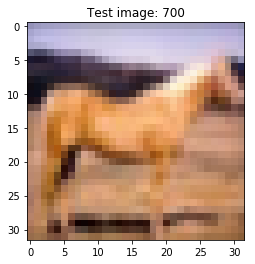

In [0]:
image_id = 700
plt.imshow(test_data[image_id])
plt.title("Test image: " + str(image_id))
plt.show()

In the following, we define the network topology. In this case, because of the redundancy typically found in images, we do not employ dropout in the convolutional layers.

In [0]:
input_shape = train_data.shape[1:]
filters = 128
kernel_size = (3,3)
pool_size = (2,2)

optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['categorical_accuracy']
activation = 'relu'
activation_function_output = 'softmax'
number_of_cnn_layers = 3
number_of_ff_layers = 3
number_of_units_output = train_target_one_hot_encoding.shape[1]

cnn_model = Sequential()
cnn_model.add(Conv2D(filters, kernel_size, input_shape = input_shape, 
                     activation = activation))

cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = pool_size))

for i in range(number_of_cnn_layers-1):
    cnn_model.add(Conv2D(filters, kernel_size, activation = activation))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size = pool_size))

cnn_model.add(Flatten())

#Feedforward network
for i in range(number_of_ff_layers):
    cnn_model.add(Dense(units = 128, activation = activation))
    cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(units = number_of_units_output, 
                    activation = activation_function_output))

cnn_model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

We can use the following command to see the network topology.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)        

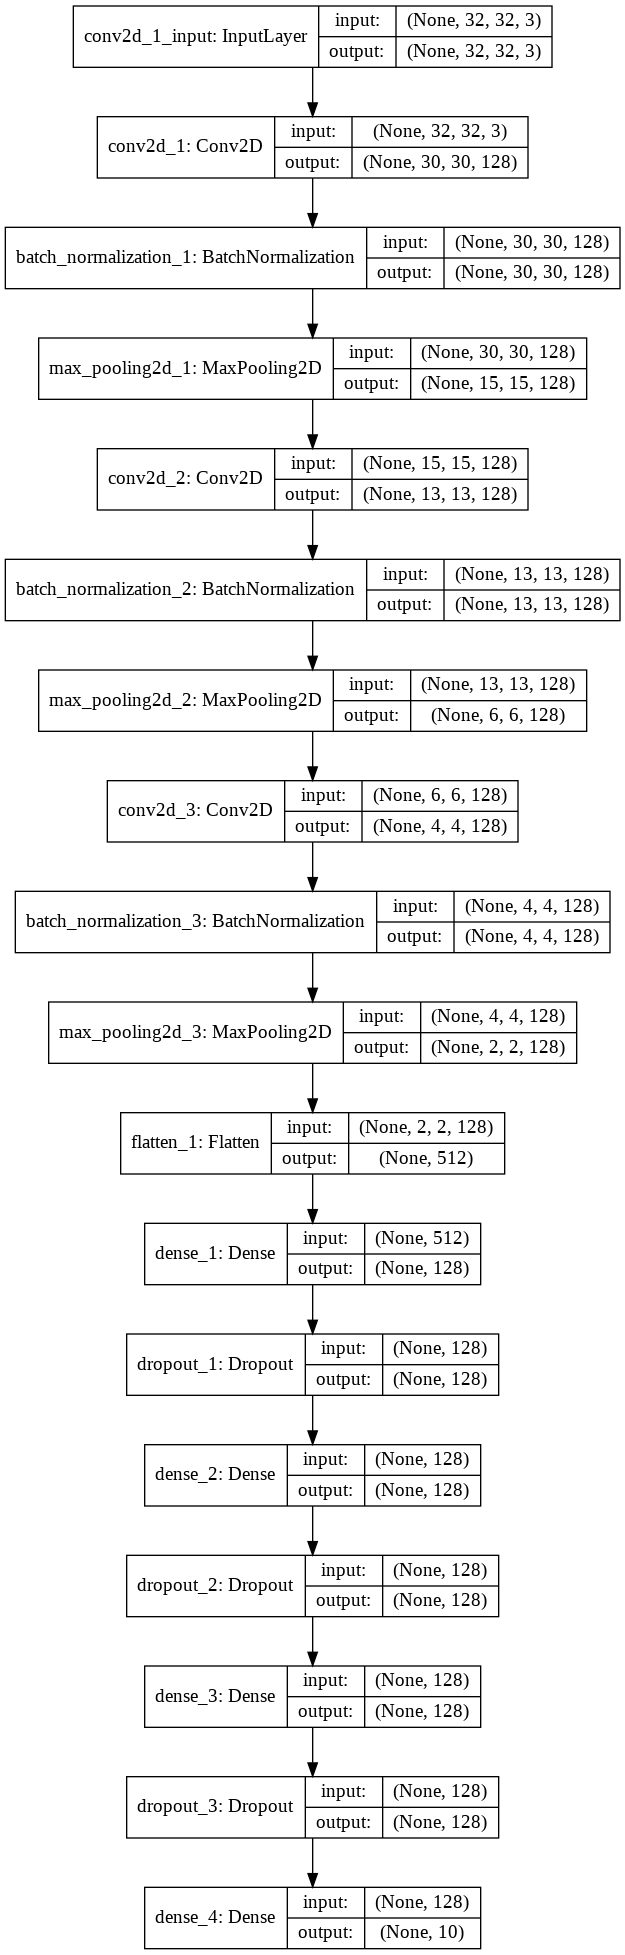

In [0]:
cnn_model.summary()
#Saving the resultant figure as 'cnn_model.png'.
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, 
           show_layer_names=True)

The training step is executed as follows. Because this network demands a high computational power, we can use a small number of epochs.

In [0]:
batch_size = 30
epochs = 50

cnn_model.fit(train_data, train_target_one_hot_encoding, 
              batch_size = batch_size, epochs = epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
50000/50000 [==============================] - 22s 434us/step - loss: 1.6269 - categorical_accuracy: 0.4144
Epoch 2/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.2326 - categorical_accuracy: 0.5745
Epoch 3/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.0536 - categorical_accuracy: 0.6433
Epoch 4/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.9372 - categorical_accuracy: 0.6854
Epoch 5/50
50000/50000 [==============================] - 15s 303us/step - loss: 0.8490 - categorical_accuracy: 0.7167
Epoch 6/50
50000/50000 [==============================] - 15s 303us/step - loss: 0.7808 - categorical_accuracy: 0.7401
Epoch 7/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.7169 - categorical_accuracy: 0.7639
Epoch 8/50
50000/50000 [==============================] - 15s 302us/step 

Since there are more than two classes, we show the classification results through a confusion matrix.

Accuracy = 0.7627
Confusion matrix:


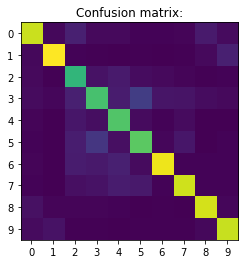

In [0]:
predictions = cnn_model.predict(test_data)
found_target = predictions.argmax(axis=1)

accuracy = accuracy_score(test_target, found_target)
print("Accuracy =", accuracy)

print("Confusion matrix:")
matrix = confusion_matrix(found_target,test_target)

plt.title("Confusion matrix:")
plt.xticks(np.linspace(0,9,10))
plt.yticks(np.linspace(0,9,10))
plt.imshow(matrix)
plt.show()

## License

This Deep Learning Tutorial is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 (CC BY-NC-ND 4.0) International License.